#**Anime Ratings Analysis & Recommender System**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset

This dataset contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this dataset is a compilation of those ratings.

**anime.csv**

* **anime_id :** myanimelist.net's unique id identifying an anime.
* **name :** full name of anime.
* **genre :** comma separated list of genres for this anime.
* **type :** movie, TV, OVA, etc.
* **episodes :** how many episodes in this show. (1 if movie).
* **rating :** average rating out of 10 for this anime.
* **members :** number of community members that are in this anime's
"group".

**rating.csv**

* **user_id :** non identifiable randomly generated user id.
* **anime_id :** the anime that this user has rated.
* **rating :** rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

In [3]:
anime=pd.read_csv('/content/drive/MyDrive/Capstone Projects/Anime Ratings Analysis & Recommender System/anime.csv')
rating=pd.read_csv('/content/drive/MyDrive/Capstone Projects/Anime Ratings Analysis & Recommender System/rating.csv')

#Basic Exploation

In [4]:
#Anime DataSet
print(f"Shape of the Anime Dataset: {anime.shape}\n")
anime.head().style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

Shape of the Anime Dataset: (12294, 7)



,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266


In [5]:
print("Information About Anime Dataset:\n")
anime.info()

Information About Anime Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
#Ratings DataSet
print(f"Shape of Rating DataSet:{rating.shape}\n")
rating.head().style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

Shape of Rating DataSet:(7813737, 3)



,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [7]:
print(f"Information About Rating DataSet :\n")
rating.info()

Information About Rating DataSet :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


#Dataset Summary

In [8]:
anime.describe().T.style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.000000,14058.221653,11455.294701,1.000000,3484.250000,10260.500000,24794.500000,34527.000000
rating,12064.000000,6.473902,1.026746,1.670000,5.880000,6.570000,7.180000,10.000000
members,12294.000000,18071.338864,54820.676925,5.000000,225.000000,1550.000000,9437.000000,1013917.000000


In [9]:
anime.describe(include=object).style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [10]:
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [11]:
anime.dropna(axis=0,inplace=True)
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [12]:
dup_anime=anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset")

There are 0 duplicate entries among 12017 entries in anime dataset


In [13]:
print("Summary of the Rating Dataset :")
rating.isna().sum().to_frame().T.style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

Summary of the Rating Dataset :


,user_id,anime_id,rating
0,0,0,0


In [14]:
dup_rating=rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entires in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicates entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entires in rating dataset.

After removing duplicates entries there are 7813736 entries in this dataset.


Let's Merge the anime and rating dataset.

In [15]:
fulldata=pd.merge(anime,rating,on="anime_id",suffixes=[None,"_user"])
fulldata=fulldata.rename(columns={"rating_user":"user_rating"})

print(f"shape of the Merged dataset:{fulldata.shape}")
print(f"\nGlimpse of the Merged DataSet : ")

fulldata.head().style.set_properties(**{"background-color":"blue","border":"1.5px solid black","color":"white"})

shape of the Merged dataset:(7813610, 9)

Glimpse of the Merged DataSet : 


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


#Custom Palette for Visualization

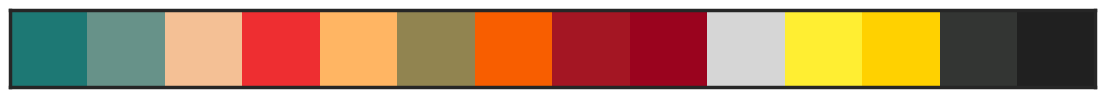

In [16]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

#Top Anime Community

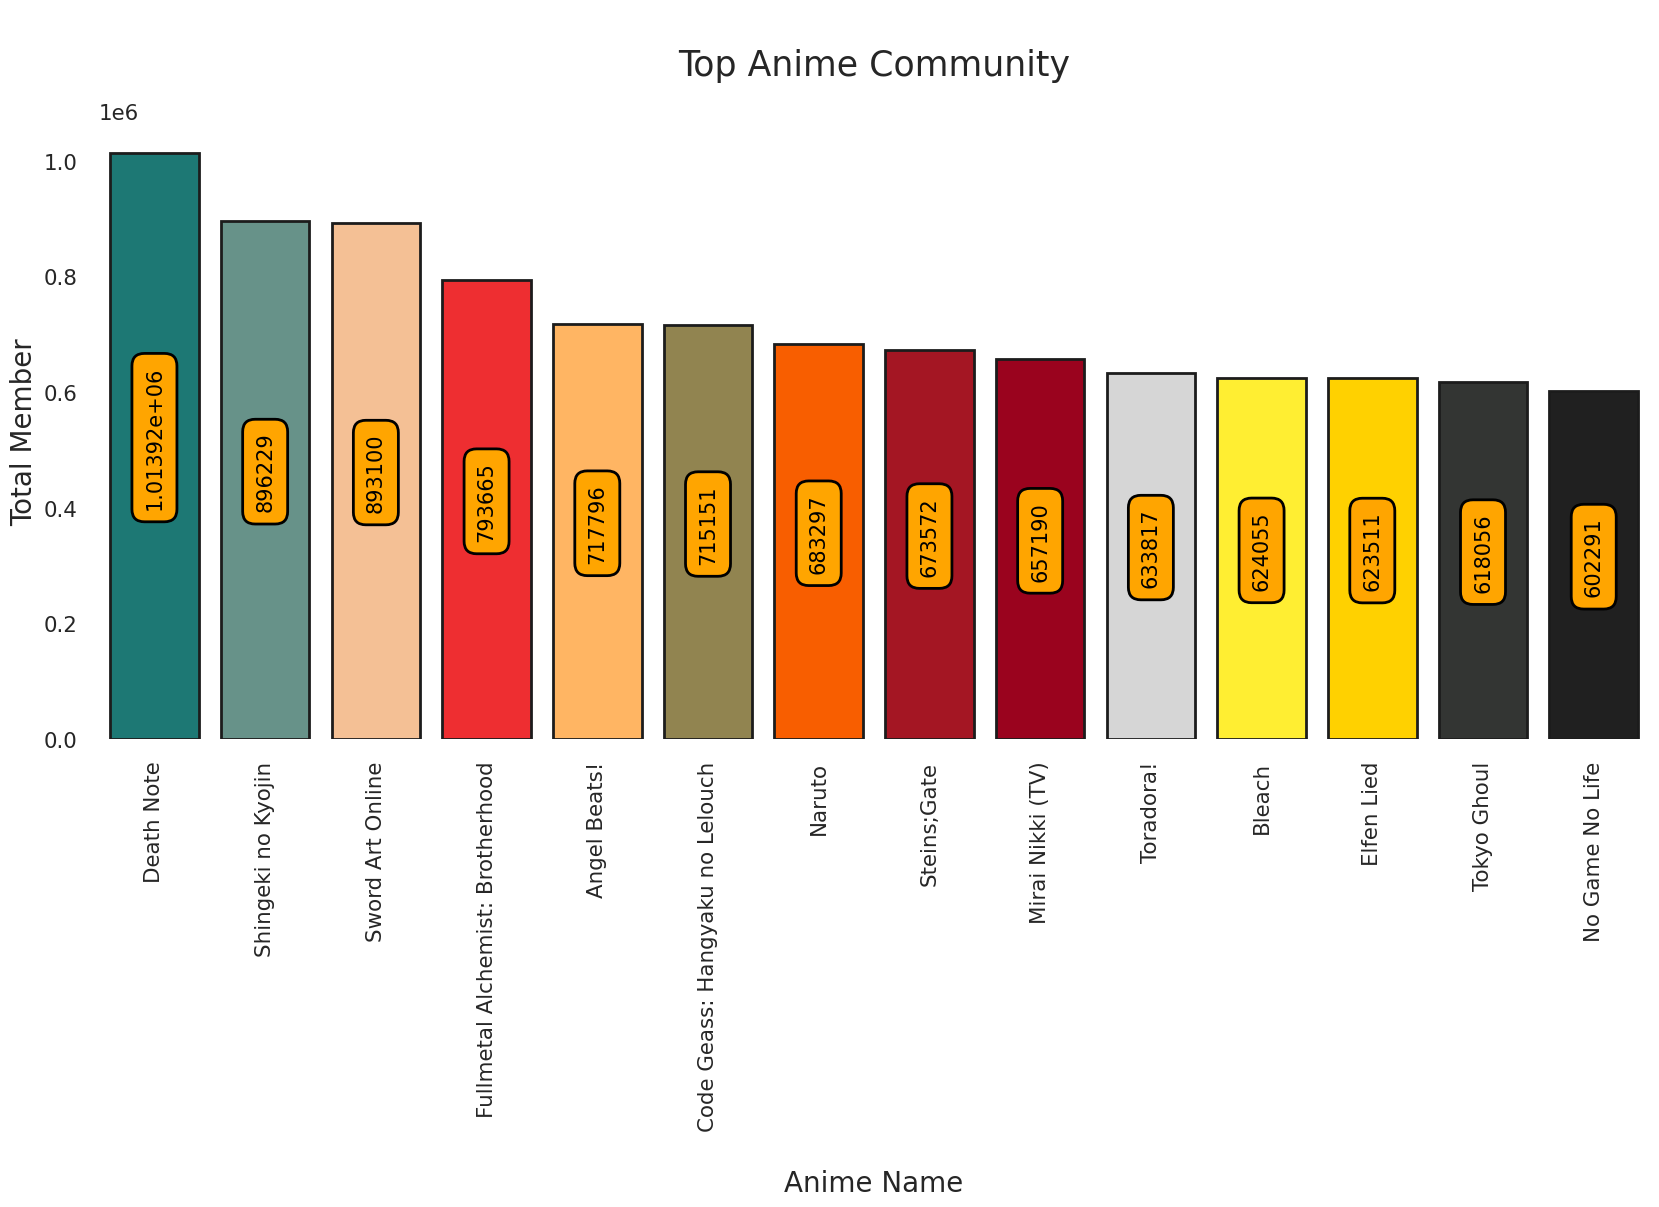

In [17]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Death Note** wears the crown for highest community members followed by **Shingeki no Kyojin** and **Sword Art Online**

#Anime Category

In [18]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Anime Categories :


,TV,OVA,Movie,Special,ONA,Music
type,3402,3090,2111,1581,526,451


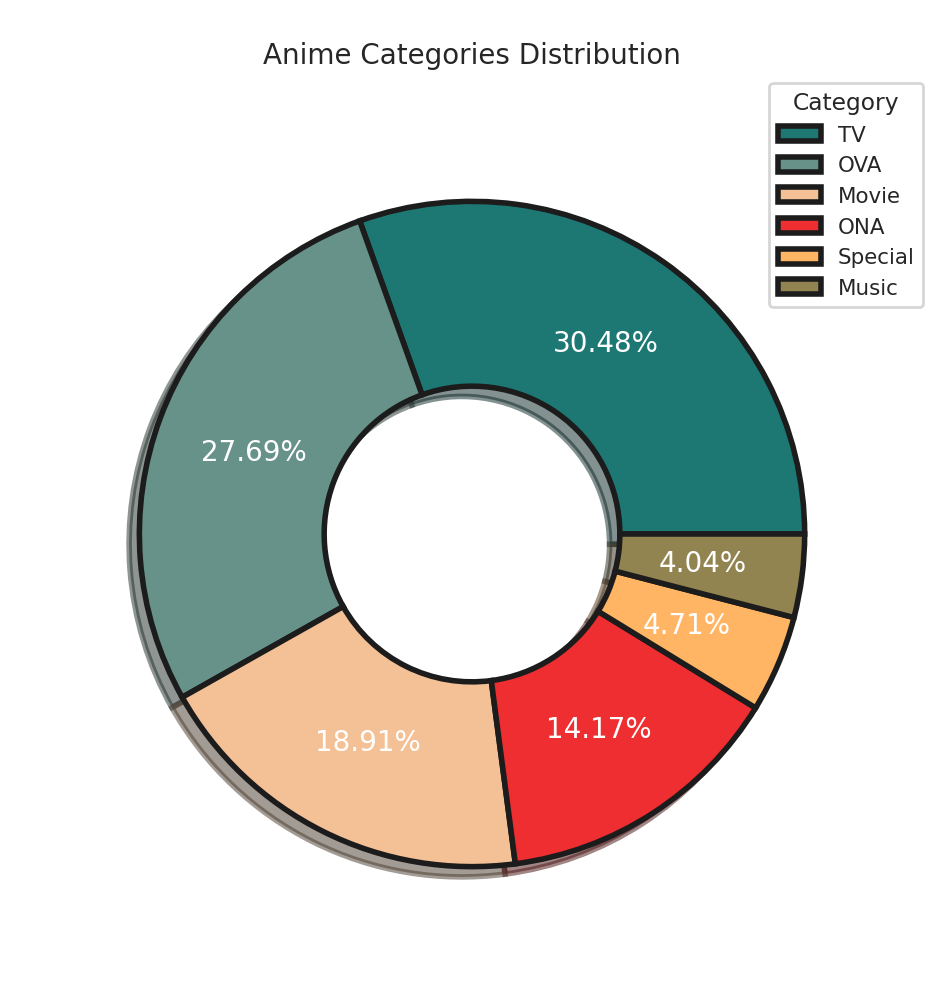

In [19]:
plt.subplots(figsize=(12,12))

labels="TV","OVA","Movie","ONA","Special","Music"
size=0.5

wedges,texts,autotexts=plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                len(top_anime_temp1[top_anime_temp1['type']=="Movie"]["type"]),
                                len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                               explode=(0,0,0,0,0,0),
                               textprops=dict(size=20,color="white"),
                               autopct="%.2f%%",
                               pctdistance=0.7,
                               radius=.9,
                               colors=palette,
                               shadow=True,
                               wedgeprops=dict(width=size,edgecolor="#1c1c1c",linewidth=4),startangle=0)
plt.legend(wedges,labels,title="Category")
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

**Insights:**

* 3402 animes are aired on TV which is 30.48% of total animes
* 2111 animes are streamed as Movie which is 18.91% of total animes
* 3090 animes are streamed as OVA which is 27.69% of total animes also greater than ONA which includes 526 animes that is 4.71% of total animes.

#Overall Anime Ratings

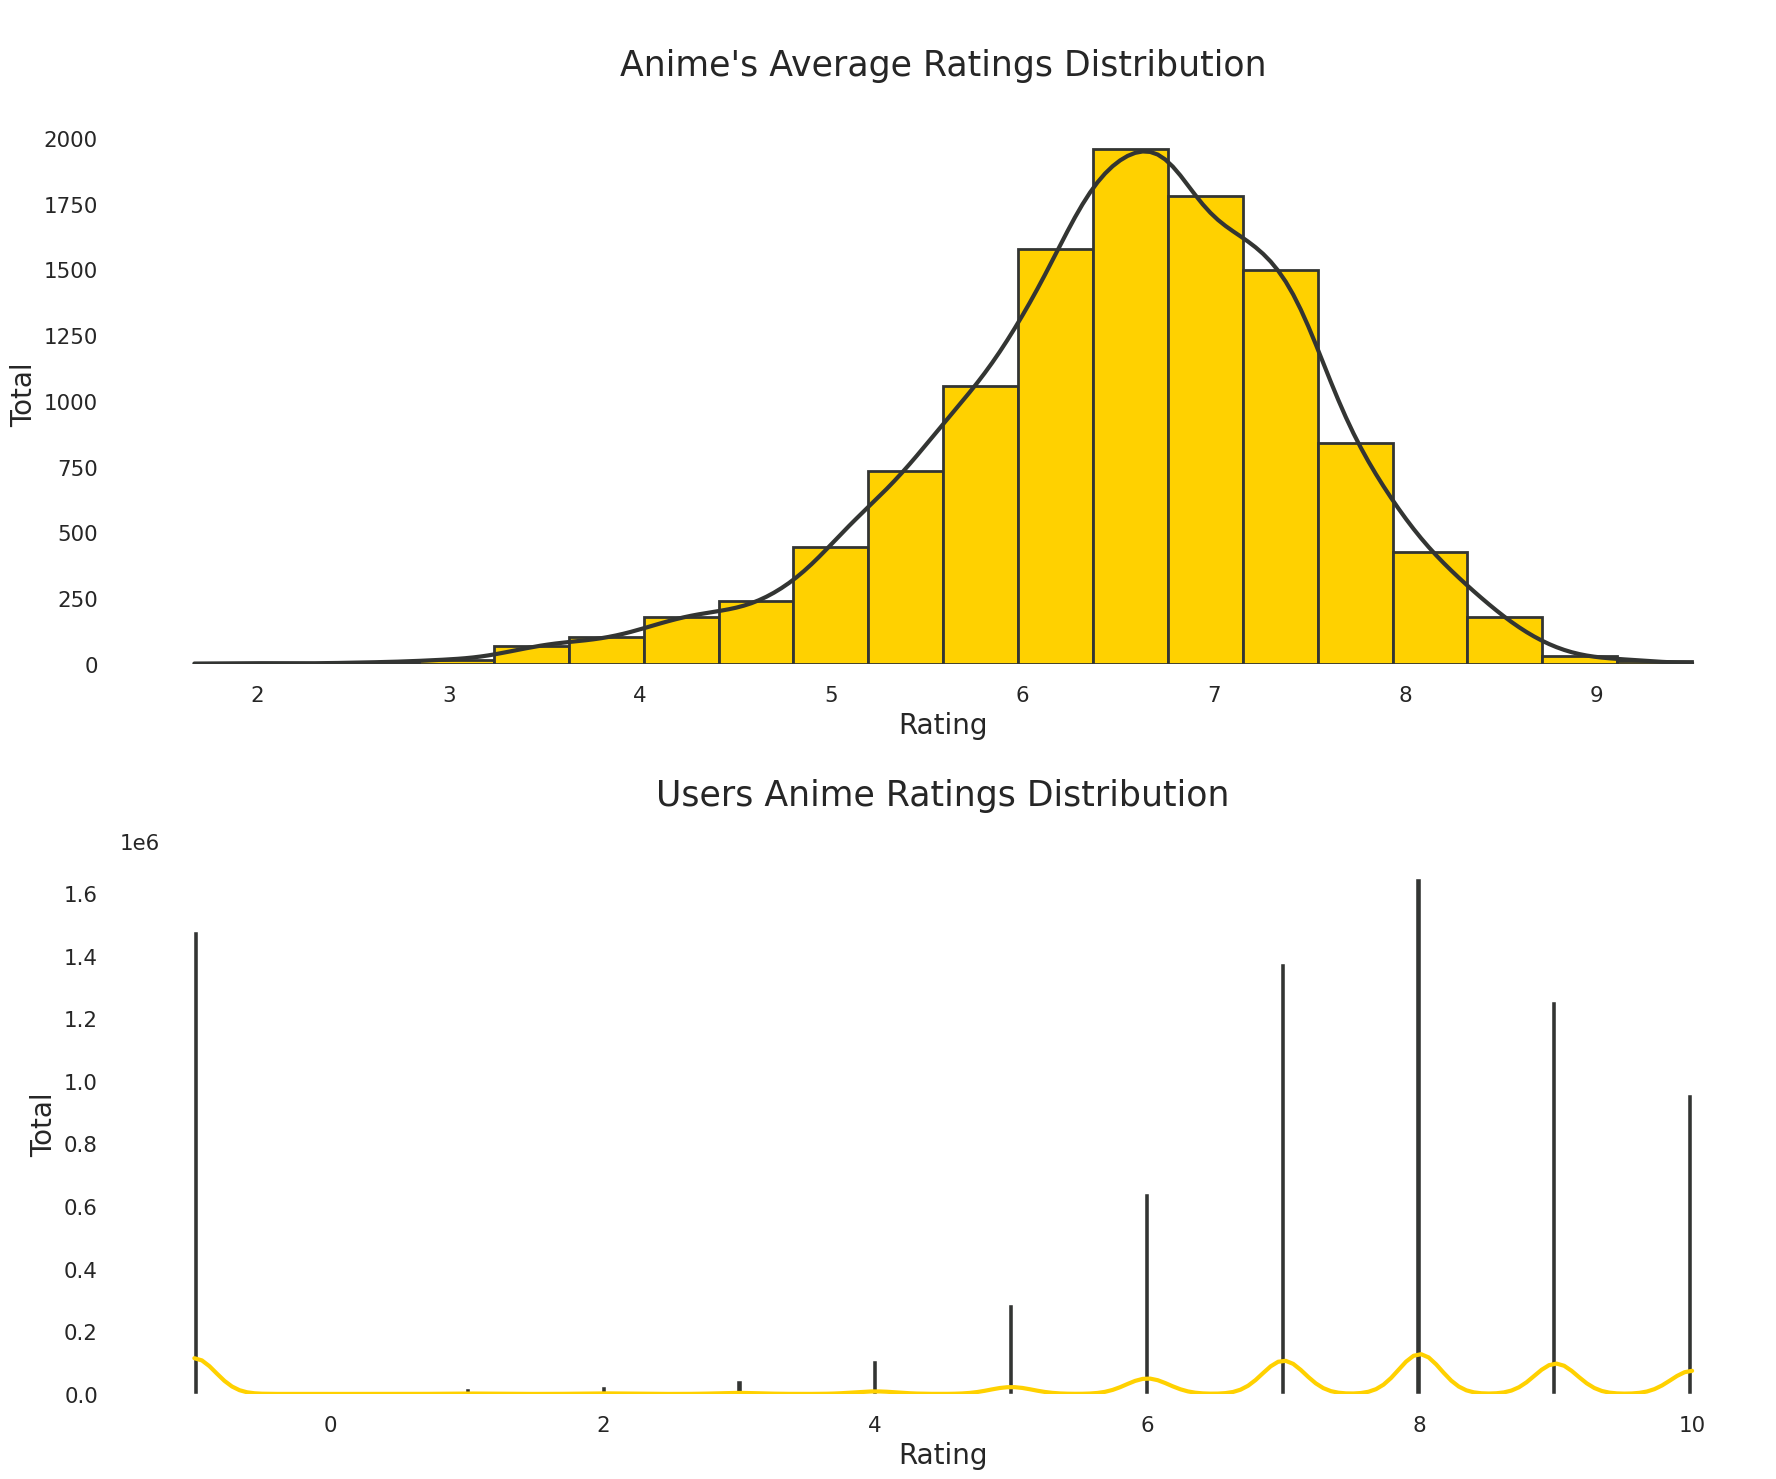

In [20]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],
             kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],
             bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 5.5 - 8.0
* Most of the users ratings are spread between 6.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

#Top Animes Based On Ratings

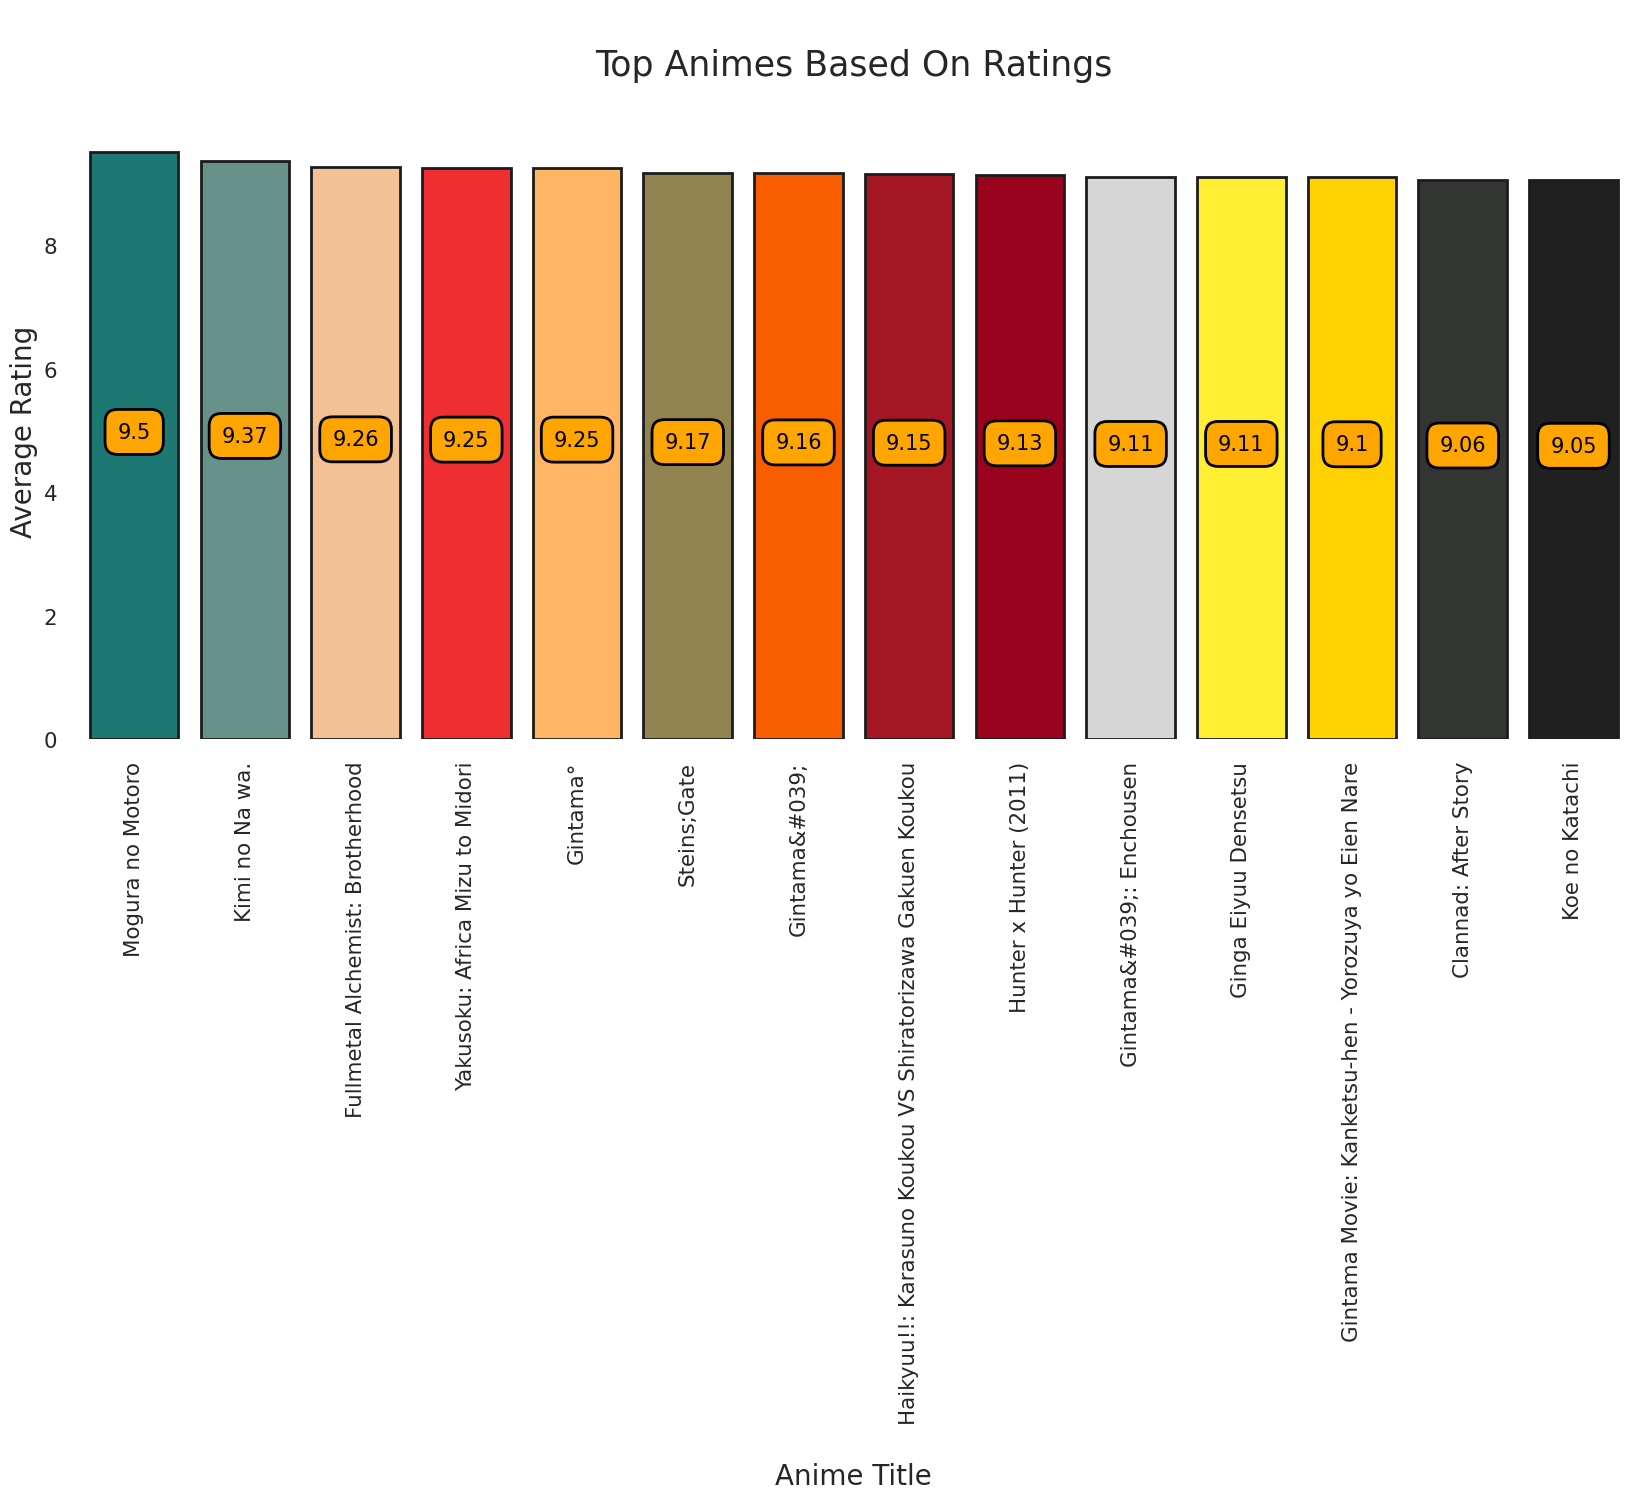

In [21]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Mogura no Motoro** wears the crown for highest rating followed by **Kimi no Na wa.** and **Fullmetal Alchemist: Brotherhood**

#Anime Genres

In [22]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame().T.style.set_properties(**{"background-color": "blue","color":"white","border": "1.5px  solid black"})

Total unique genres are 43
Occurances of unique genres :


<ipython-input-22-9b9e6c4a3f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")


,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,Slice Of Life,Hentai,Supernatural,Mecha,Music,Historical,Magic,Ecchi,Shoujo,Seinen,Sports,Mystery,Super Power,Military,Parody,Space,Horror,Harem,Demons,Martial Arts,Psychological,Dementia,Police,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
genre,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,1115,1095,964,910,763,719,712,619,576,513,508,472,433,410,379,362,348,306,279,246,221,200,183,161,142,97,84,65,61,54,52,41,37


let's explore how genre's wordcloud looks like



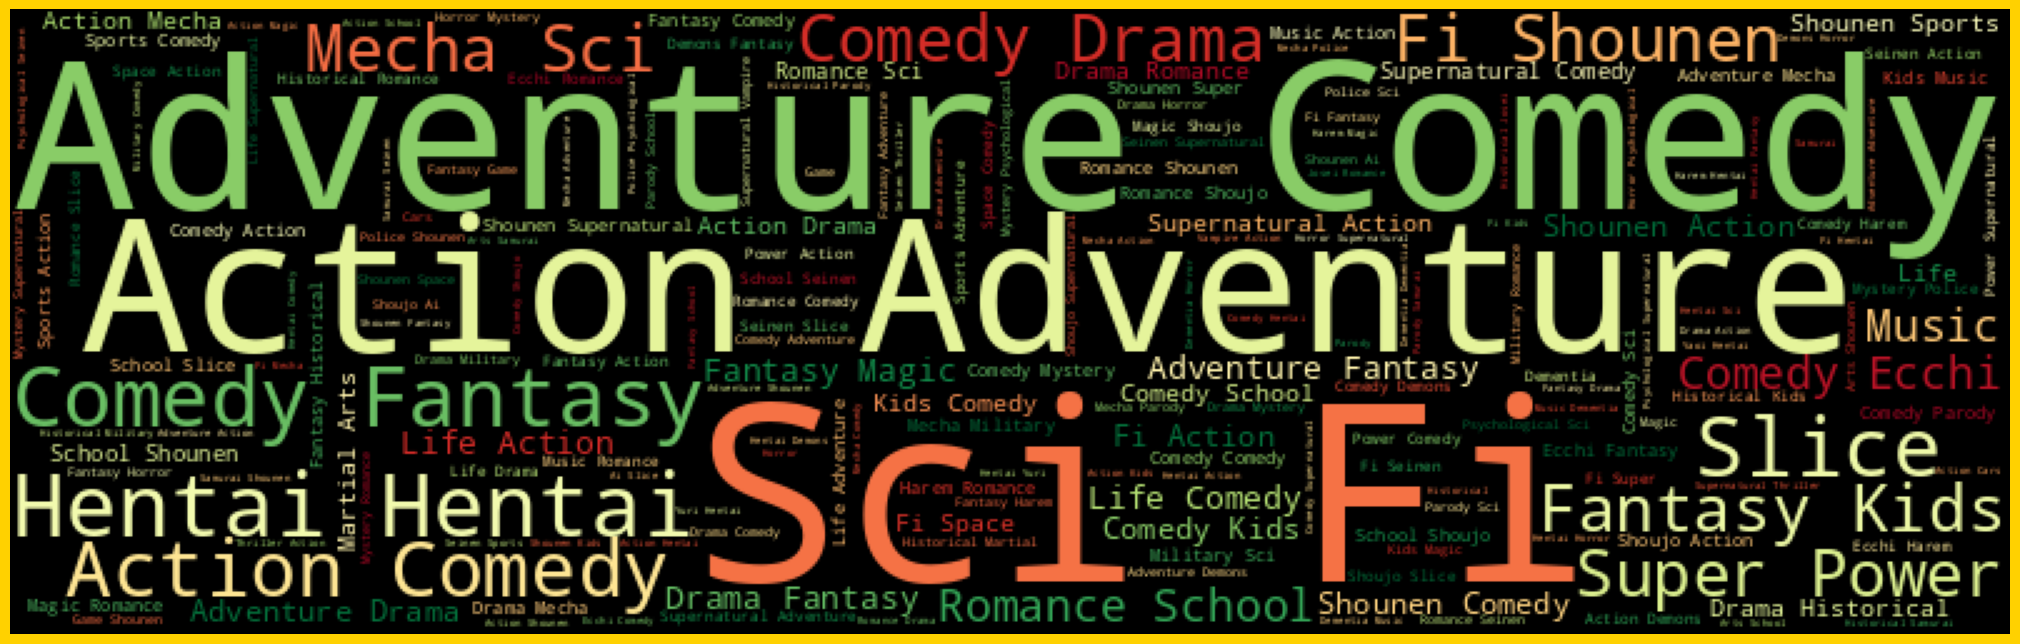

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100")
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0)
plt.show()

#Final Data Preprocessing

In [24]:
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "blue","color":"white","border": "1.5px  solid black"})

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


In [25]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

In [26]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have got many japanese or special character symbols in anime name. Let's remove those using this function

In [27]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

data["name"] = data["name"].apply(text_cleaning)

In [28]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Content Based Recommender

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [30]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):

    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]

    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11),
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)

    print(f"Recommendations for {title} viewers :\n")

    return dataframe.style.set_properties(**{"background-color": "blue","color":"white","border": "1.5px  solid black"})

In [31]:
give_recommendation("Gintama")

Recommendations for Gintama viewers :



,Anime Name,Rating
No,,
1,Gintama',9.160000
2,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,9.100000
3,Gintama': Enchousen,9.110000
4,Gintama,9.040000
5,Shokugeki no Souma,8.610000
6,Gintama: Yorinuki Gintama-san on Theater 2D,8.600000
7,Nagi no Asukara,8.320000
8,Kara no Kyoukai 3: Tsuukaku Zanryuu,8.210000
9,Major Movie: Yuujou no Winning Shot,8.160000
